In [5]:
import matplotlib.pyplot as plt

In [6]:
def open_log(filepath):
    with open(filepath, 'r') as f:
        column_names = f.readline().split()

        d = {c : [] for c in column_names}
        for line in f:
            for c, val in zip(column_names, line.split()):
                d[c].append(float(val))
    return d

In [7]:
def get_mean_sd(ll, key):
    ll = [l[key] for l in ll]
    means = []
    sds = []
    for l in zip(*ll):
        mean = sum(l) / len(l)
        sd = (sum((i - mean)**2 for i in l) / len(l)) ** 0.5

        means.append(mean)
        sds.append(sd)
    return means, sds

In [9]:
baseline_1 = open_log("./final_models/baseline_ppo_final/model_1/progress.txt")
baseline_2 = open_log("./final_models/baseline_ppo_final/model_2/progress.txt")
baseline_3 = open_log("./final_models/baseline_ppo_final/model_3/progress.txt")

baseline_ret_means, baseline_ret_sds = get_mean_sd([baseline_1, baseline_2, baseline_3], "AverageEpRet")
baseline_crash_means, baseline_crash_sds = get_mean_sd([baseline_1, baseline_2, baseline_3], "%Crash")

hardcoded_recovery_1 = open_log("./final_models/hardcoded_recovery_final/model_1/progress.txt")
hardcoded_recovery_2 = open_log("./final_models/hardcoded_recovery_final/model_2/progress.txt")
hardcoded_recovery_3 = open_log("./final_models/hardcoded_recovery_final/model_3/progress.txt")

hardcoded_recovery_ret_means, hardcoded_recovery_ret_sds = get_mean_sd([hardcoded_recovery_1, hardcoded_recovery_2, hardcoded_recovery_3], "AverageEpRet")
hardcoded_recovery_crash_means, hardcoded_recovery_crash_sds = get_mean_sd([hardcoded_recovery_1, hardcoded_recovery_2, hardcoded_recovery_3], "%Crash")

teacher_assist_1 = open_log("./final_models/teacher_assist_final/model_1/progress.txt")
teacher_assist_2 = open_log("./final_models/teacher_assist_final/model_2/progress.txt")
teacher_assist_3 = open_log("./final_models/teacher_assist_final/model_3/progress.txt")

teacher_assist_ret_means, teacher_assist_ret_sds = get_mean_sd([teacher_assist_1, teacher_assist_2, teacher_assist_3], "AverageEpRet")
teacher_assist_crash_means, teacher_assist_crash_sds = get_mean_sd([teacher_assist_1, teacher_assist_2, teacher_assist_3], "%Crash")

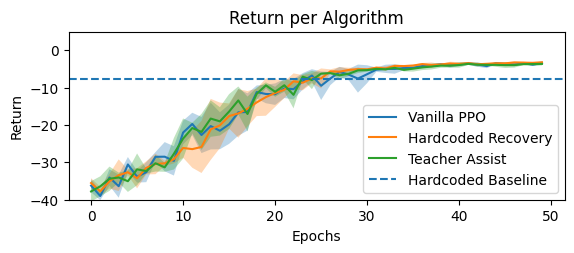

In [10]:
plt.subplot(2, 1, 1)
plt.fill_between(
    range(len(baseline_ret_means)),
    [a - b for a, b in zip(baseline_ret_means, baseline_ret_sds)],
    [a + b for a, b in zip(baseline_ret_means, baseline_ret_sds)],
    alpha=0.3
)
plt.plot(range(len(baseline_ret_means)), baseline_ret_means, label='Vanilla PPO')

plt.fill_between(
    range(len(hardcoded_recovery_ret_means)),
    [a - b for a, b in zip(hardcoded_recovery_ret_means, hardcoded_recovery_ret_sds)],
    [a + b for a, b in zip(hardcoded_recovery_ret_means, hardcoded_recovery_ret_sds)],
    alpha=0.3
)
plt.plot(range(len(hardcoded_recovery_ret_means)), hardcoded_recovery_ret_means, label='Hardcoded Recovery')

plt.fill_between(
    range(len(teacher_assist_ret_means)),
    [a - b for a, b in zip(teacher_assist_ret_means, teacher_assist_ret_sds)],
    [a + b for a, b in zip(teacher_assist_ret_means, teacher_assist_ret_sds)],
    alpha=0.3
)
plt.plot(range(len(teacher_assist_ret_means)), teacher_assist_ret_means, label='Teacher Assist')

plt.axhline(-7.788410349897191, linestyle='--', label='Hardcoded Baseline')
plt.ylim((-40, 5))
plt.title("Return per Algorithm")
plt.xlabel("Epochs")
plt.ylabel("Return")
plt.legend()
plt.show()


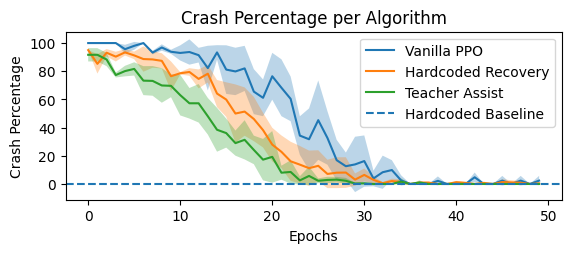

In [11]:
plt.subplot(2, 1, 1)
plt.fill_between(
    range(len(baseline_crash_means)),
    [a - b for a, b in zip(baseline_crash_means, baseline_crash_sds)],
    [a + b for a, b in zip(baseline_crash_means, baseline_crash_sds)],
    alpha=0.3
)
plt.plot(range(len(baseline_crash_means)), baseline_crash_means, label='Vanilla PPO')

plt.fill_between(
    range(len(hardcoded_recovery_crash_means)),
    [a - b for a, b in zip(hardcoded_recovery_crash_means, hardcoded_recovery_crash_sds)],
    [a + b for a, b in zip(hardcoded_recovery_crash_means, hardcoded_recovery_crash_sds)],
    alpha=0.3
)
plt.plot(range(len(hardcoded_recovery_crash_means)), hardcoded_recovery_crash_means, label='Hardcoded Recovery')

plt.fill_between(
    range(len(teacher_assist_crash_means)),
    [a - b for a, b in zip(teacher_assist_crash_means, teacher_assist_crash_sds)],
    [a + b for a, b in zip(teacher_assist_crash_means, teacher_assist_crash_sds)],
    alpha=0.3
)
plt.plot(range(len(teacher_assist_crash_means)), teacher_assist_crash_means, label='Teacher Assist')

plt.axhline(0, linestyle='--', label='Hardcoded Baseline')
plt.title("Crash Percentage per Algorithm")
plt.xlabel("Epochs")
plt.ylabel("Crash Percentage")
plt.legend()
plt.show()